In [10]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime

In [115]:
# Load connection lines data
with open ('Метро-время-пересадки-между-станциями.json', 'r') as file_c:
    data_connection = json.load(file_c)

In [14]:
# Load JSON data from a file
with open('metro_time_between_stations.json', 'r') as file:
    data = json.load(file)
    
    

In [12]:
# Define the weight function with time restriction logic
def weight_function(weight, current_time, restricted_start, restricted_end):
    if restricted_start <= current_time < restricted_end:
        return float('inf')  # Effectively make the edge non-traversable
    return weight

In [13]:
# Create a directed graph
graph = nx.DiGraph()


In [7]:
def clean_time_value(time):
    if ',' in time:
        time = time.replace(',', '.')
    return time
    

In [116]:
# Add edges to the graph
for entry in data:
    id_st1 = entry['id_st1']
    id_st2 = entry['id_st2']
    time = float(clean_time_value(entry['time']))
    graph.add_edge(id_st1, id_st2, weight=time)

for entry in data_connection:
    id_st1 = entry['id1']
    id_st2 = entry['id2']
    time = float(clean_time_value(entry['time']))
    graph.add_edge(id_st1, id_st2, weight=time)

In [117]:
# Define the restricted time range (2 PM to 3 PM)
restricted_start = datetime.strptime("14:00:00", "%H:%M:%S").time()
restricted_end = datetime.strptime("15:00:00", "%H:%M:%S").time()

In [118]:
# Function to get the dynamic weight for an edge
def get_dynamic_weight(u, v, current_time, restricted_start, restricted_end):
    original_weight = graph[u][v]['weight']
    return weight_function(original_weight, current_time, restricted_start, restricted_end)


In [119]:
# Function to apply dynamic weights and find the shortest path using Dijkstra's algorithm
def find_shortest_path(graph, start, end, current_time, restricted_start, restricted_end):
    # Create a new graph with adjusted weights based on the current time
    adjusted_graph = nx.DiGraph()
    
    for u, v, data in graph.edges(data=True):
        dynamic_weight = get_dynamic_weight(u, v, current_time, restricted_start, restricted_end)
        adjusted_graph.add_edge(u, v, weight=dynamic_weight)
    
    # Use Dijkstra's algorithm to find the shortest path
    try:
        shortest_path = nx.dijkstra_path(adjusted_graph, source=start, target=end)
        shortest_path_length = nx.dijkstra_path_length(adjusted_graph, source=start, target=end)
        return shortest_path, shortest_path_length
    except nx.NetworkXNoPath:
        return None, float('inf')

In [120]:
# Get the current time for this example (in a real scenario, you would use the actual current time)
current_time = datetime.now().time()

In [121]:
# Define the start and end nodes for the shortest path search
start_node = '1'
end_node = '4'

In [122]:
# Find the shortest path
path, path_length = find_shortest_path(graph, start_node, end_node, current_time, restricted_start, restricted_end)


In [123]:
# Print the shortest path and its length
if path:
    print(f"Shortest path: {path} with length {path_length}")
else:
    print("No path found between the nodes within the given constraints.")

Shortest path: ['1', '2', '3', '4'] with length 9.0


In [28]:
# Optionally, you can print the edges to verify
# print("Graph edges with weights:")
# for u, v, weight in graph.edges(data='weight'):
#     print(f"({u}, {v}, {weight})")


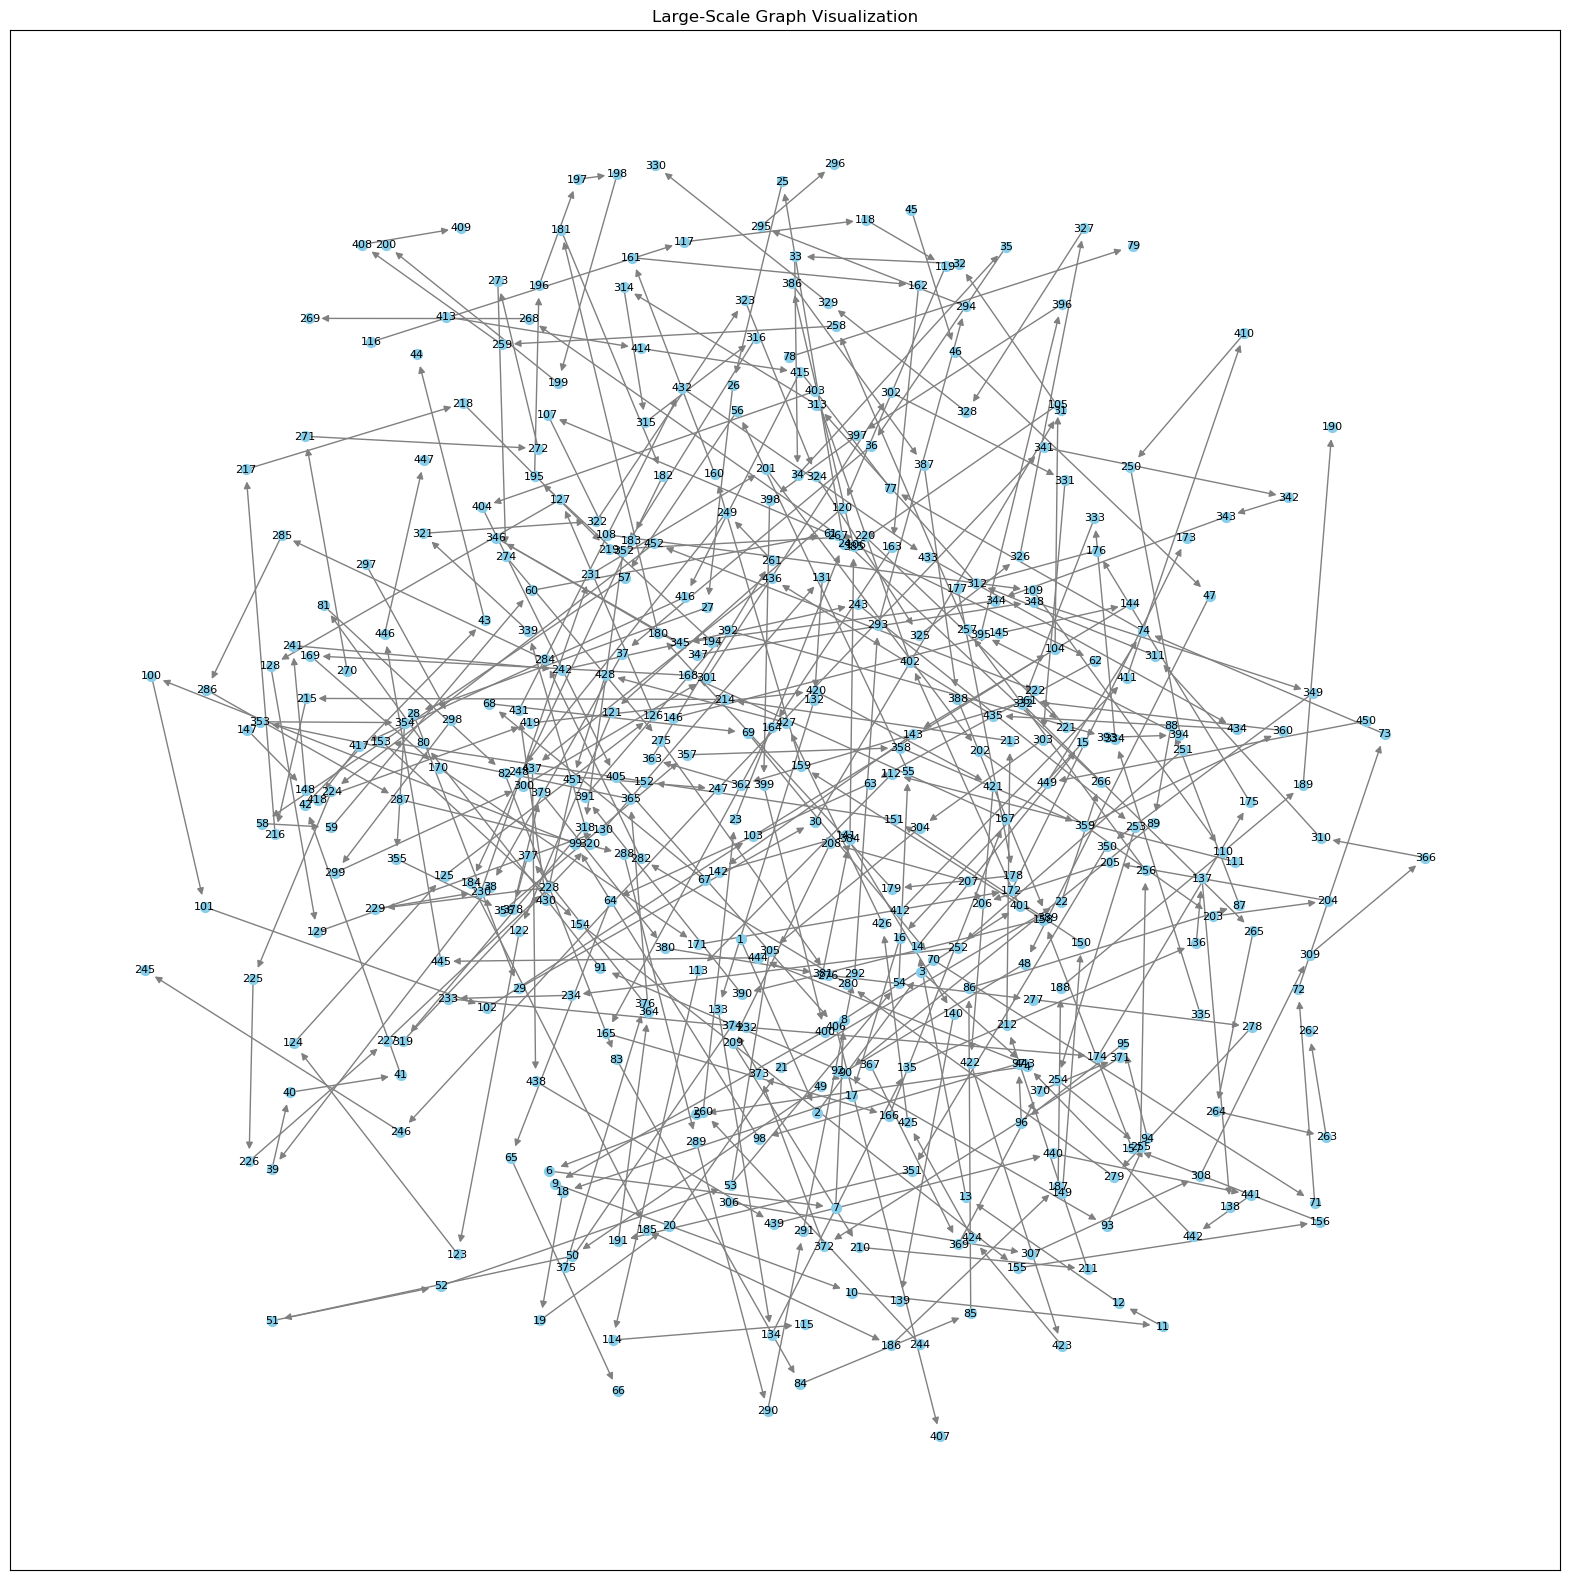

In [31]:
# Define the layout for large-scale graph visualization
plt.figure(figsize=(20, 20))  # Set the size of the plot

# Use spring layout for better spacing
pos = nx.spring_layout(graph, k=0.15, iterations=20)

# Draw the nodes and edges
nx.draw_networkx_nodes(graph, pos, node_size=50, node_color='skyblue')
nx.draw_networkx_edges(graph, pos, edge_color='gray')

# Optionally add labels (comment this out if too cluttered)
nx.draw_networkx_labels(graph, pos, font_size=8)

# Optionally add edge labels (comment this out if too cluttered)
# edge_labels = nx.get_edge_attributes(graph, 'weight')
# nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=6)

# Show the plot
plt.title("Large-Scale Graph Visualization")
plt.show()

### Verification

In [163]:
# Load JSON data from a file
with open('Наименование-станций-метро.json', 'r') as file:
    station_name = json.load(file)

In [33]:
# Create an undirected graph
graph_b = nx.Graph()

In [126]:
# Add edges to the graph
for entry in data:
    id_st1 = entry['id_st1']
    id_st2 = entry['id_st2']
    time = float(clean_time_value(entry['time']))
    graph_b.add_edge(id_st1, id_st2, weight=time)

for entry in data_connection:
    id_st1 = entry['id1']
    id_st2 = entry['id2']
    time = float(clean_time_value(entry['time']))
    graph_b.add_edge(id_st1, id_st2, weight=time)    

In [175]:
# Define the start and end nodes

# Define the times
time3 = "06:11:26"
time4 = "06:52:04"

start_node = '87' #'422'
end_node = '51'#'222'#'452'#'224'

In [176]:
# Check if there is a path between the start and end nodes
path_exists = nx.has_path(graph_b, source=start_node, target=end_node)


In [177]:
# Print whether a path exists or not
if path_exists:
    print(f"A path exists between nodes {start_node} and {end_node}.")
else:
    print(f"No path exists between nodes {start_node} and {end_node}.")

A path exists between nodes 87 and 51.


In [178]:
# If path exists, find and print the shortest path
if path_exists:
    try:
        shortest_path = nx.dijkstra_path(graph_b, source=start_node, target=end_node)
        shortest_path_length = nx.dijkstra_path_length(graph_b, source=start_node, target=end_node)
        print(f"Shortest path: {shortest_path} with length {shortest_path_length}")
    except nx.NetworkXNoPath:
        print("No path found using Dijkstra's algorithm.")



Shortest path: ['87', '55', '54', '53', '52', '51'] with length 16.35


In [179]:
# Function to find a station by id
def find_station_by_id(data, target_id):
    for station in data:
        if station['id'] == target_id:
            return station['name_station']
    return None


In [180]:
# Holds the station id and the corresponding name
station_with_names = []

for station_id in shortest_path:
    result = find_station_by_id(station_name, station_id)
    station_with_names.append((station_id, result))
    
print(station_with_names)

#You can use this URL for manual validation
# https://yandex.ru/metro/moscow/st56273671/st05575296?route_from_id=st56273671&route_to_id=st05575296&scheme_id=sc34974011

[('87', 'Киевская КЛ'), ('55', 'Киевская АПЛ'), ('54', 'Парк победы АПЛ'), ('53', 'Славянский бульвар'), ('52', 'Кунцевская АПЛ'), ('51', 'Молодёжная')]


In [181]:
# Convert the string times to datetime objects
format = "%H:%M:%S"
time3_dt = datetime.strptime(time3, format)
time4_dt = datetime.strptime(time4, format)

# Calculate the difference between the times
time_difference = time4_dt - time3_dt

# Convert the time difference to minutes
minutes_difference = time_difference.total_seconds() / 60

print(f"The difference in minutes is: {minutes_difference} minutes")

# Calculate the efficiency gain
efficiency_gain = ((minutes_difference - shortest_path_length) / minutes_difference) * 100

print(f"The efficiency gain is: {efficiency_gain:.2f}%")

The difference in minutes is: 40.63333333333333 minutes
The efficiency gain is: 59.76%


### Regression Model

In [182]:
import pandas as pd

In [202]:
def get_processing_time(time3, time4):
    # Convert the string times to datetime objects
    format = "%H:%M:%S"
    time3_dt = datetime.strptime(time3, format)
    time4_dt = datetime.strptime(time4, format)

    # Calculate the difference between the times
    time_difference = time4_dt - time3_dt

    # Convert the time difference to minutes
    minutes_difference = round(time_difference.total_seconds() / 60, 2)
    
    return minutes_difference

In [199]:
# Load JSON data from a file
with open('Заявки.json', 'r') as file:
    requests = json.load(file)

In [224]:
data_rg = {
    "id": [],
    "datetime": [],
    "task_start": [],
    "task_end": [],
    "task_duration": [],  # in minutes
    "cat_pas": [],
    "status": [],
    "INSP_SEX_M": [],
    "INSP_SEX_F": [],
    "id_st1": [],
    "id_st2": [],
    "number_of_stations":[],
    "estimated_time_for_task":[]
}

In [225]:
for req in requests:
    data_rg['id'].append(req['id'])
    data_rg['datetime'].append(req['datetime'])
    data_rg['task_start'].append(req['time3'])
    data_rg['task_end'].append(req['time4'])
    data_rg['task_duration'].append(get_processing_time(req['time3'],req['time4']))
    data_rg['cat_pas'].append(req['cat_pas'])
    data_rg['status'].append(req['status'])
    data_rg['INSP_SEX_M'].append(req['INSP_SEX_M'])
    data_rg['INSP_SEX_F'].append(req['INSP_SEX_F'])
    data_rg['id_st1'].append(req['id_st1'])
    data_rg['id_st2'].append(req['id_st2'])
    data_rg['number_of_stations'].append(len(nx.dijkstra_path(graph_b, source=req['id_st1'], target=req['id_st2'])))
    data_rg['estimated_time_for_task'].append(nx.dijkstra_path_length(graph_b, source=req['id_st1'], target=req['id_st2']))
    

In [ ]:
data_rg

In [227]:
# Convert to DataFrame
df = pd.DataFrame(data_rg)


In [231]:
# Extracting date and time components
df['hour'] = pd.to_datetime(df['task_start']).dt.hour
df['day_of_week'] = pd.to_datetime(df['task_start']).dt.dayofweek

In [228]:
# Display the dataframe
# Statistical Analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [229]:
# Model to find the impact of cat_pas on time_deviation
model = smf.ols('task_duration ~ C(cat_pas)', data=df).fit()

# Summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          task_duration   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.641
Date:                Thu, 13 Jun 2024   Prob (F-statistic):              0.102
Time:                        23:45:15   Log-Likelihood:                -2353.0
No. Observations:                 389   AIC:                             4726.
Df Residuals:                     379   BIC:                             4766.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.0389     11.91

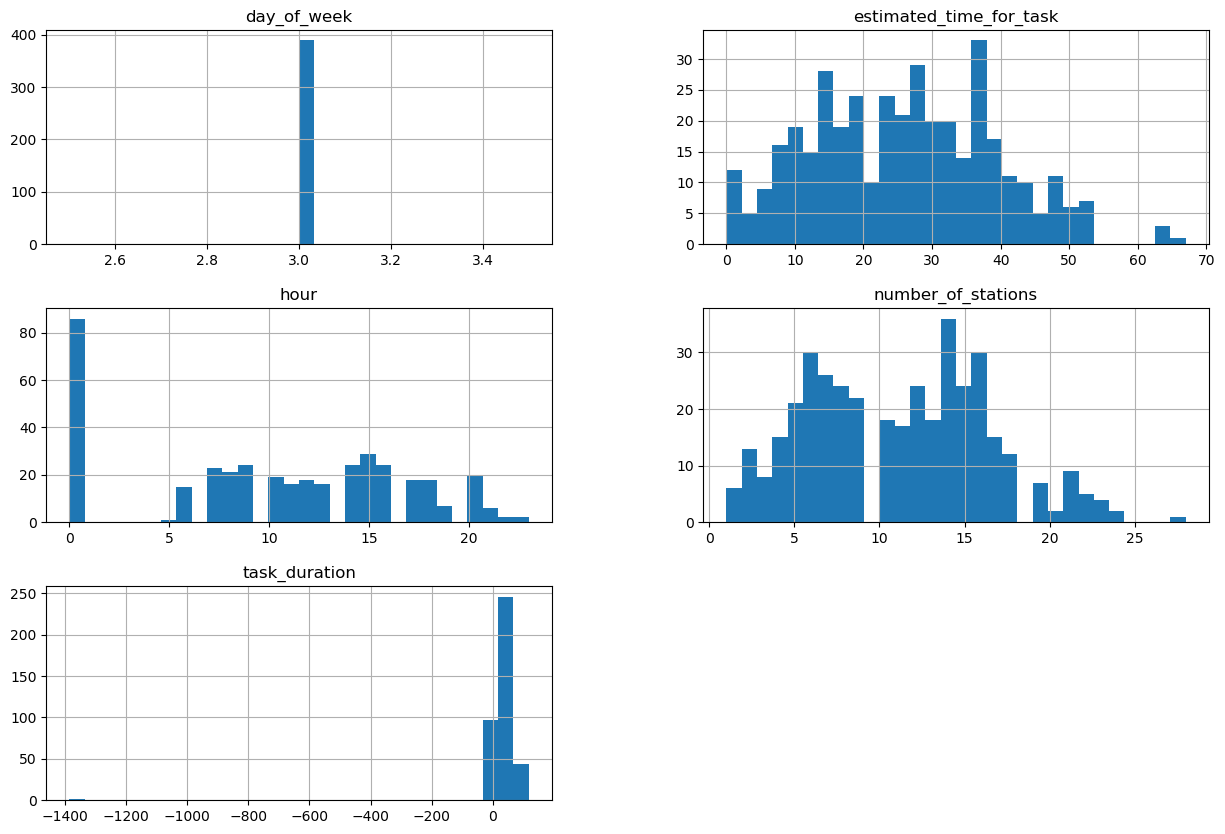

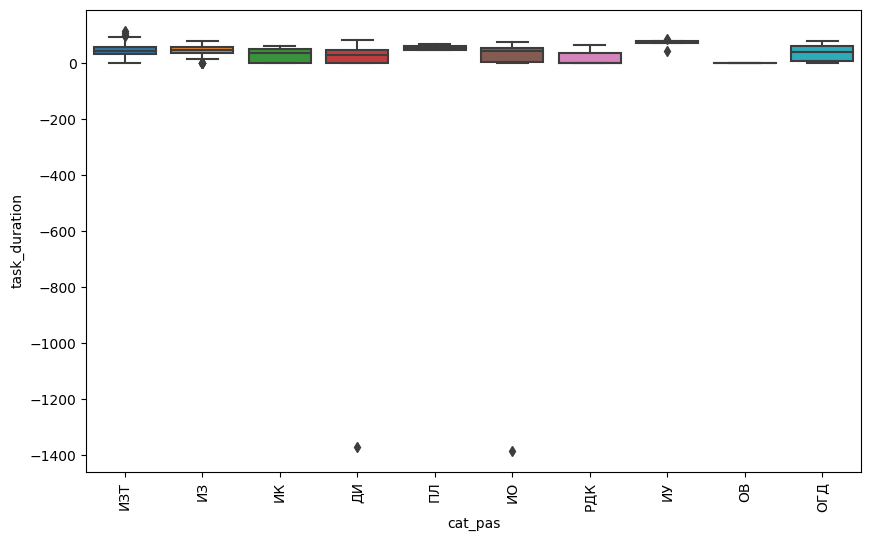

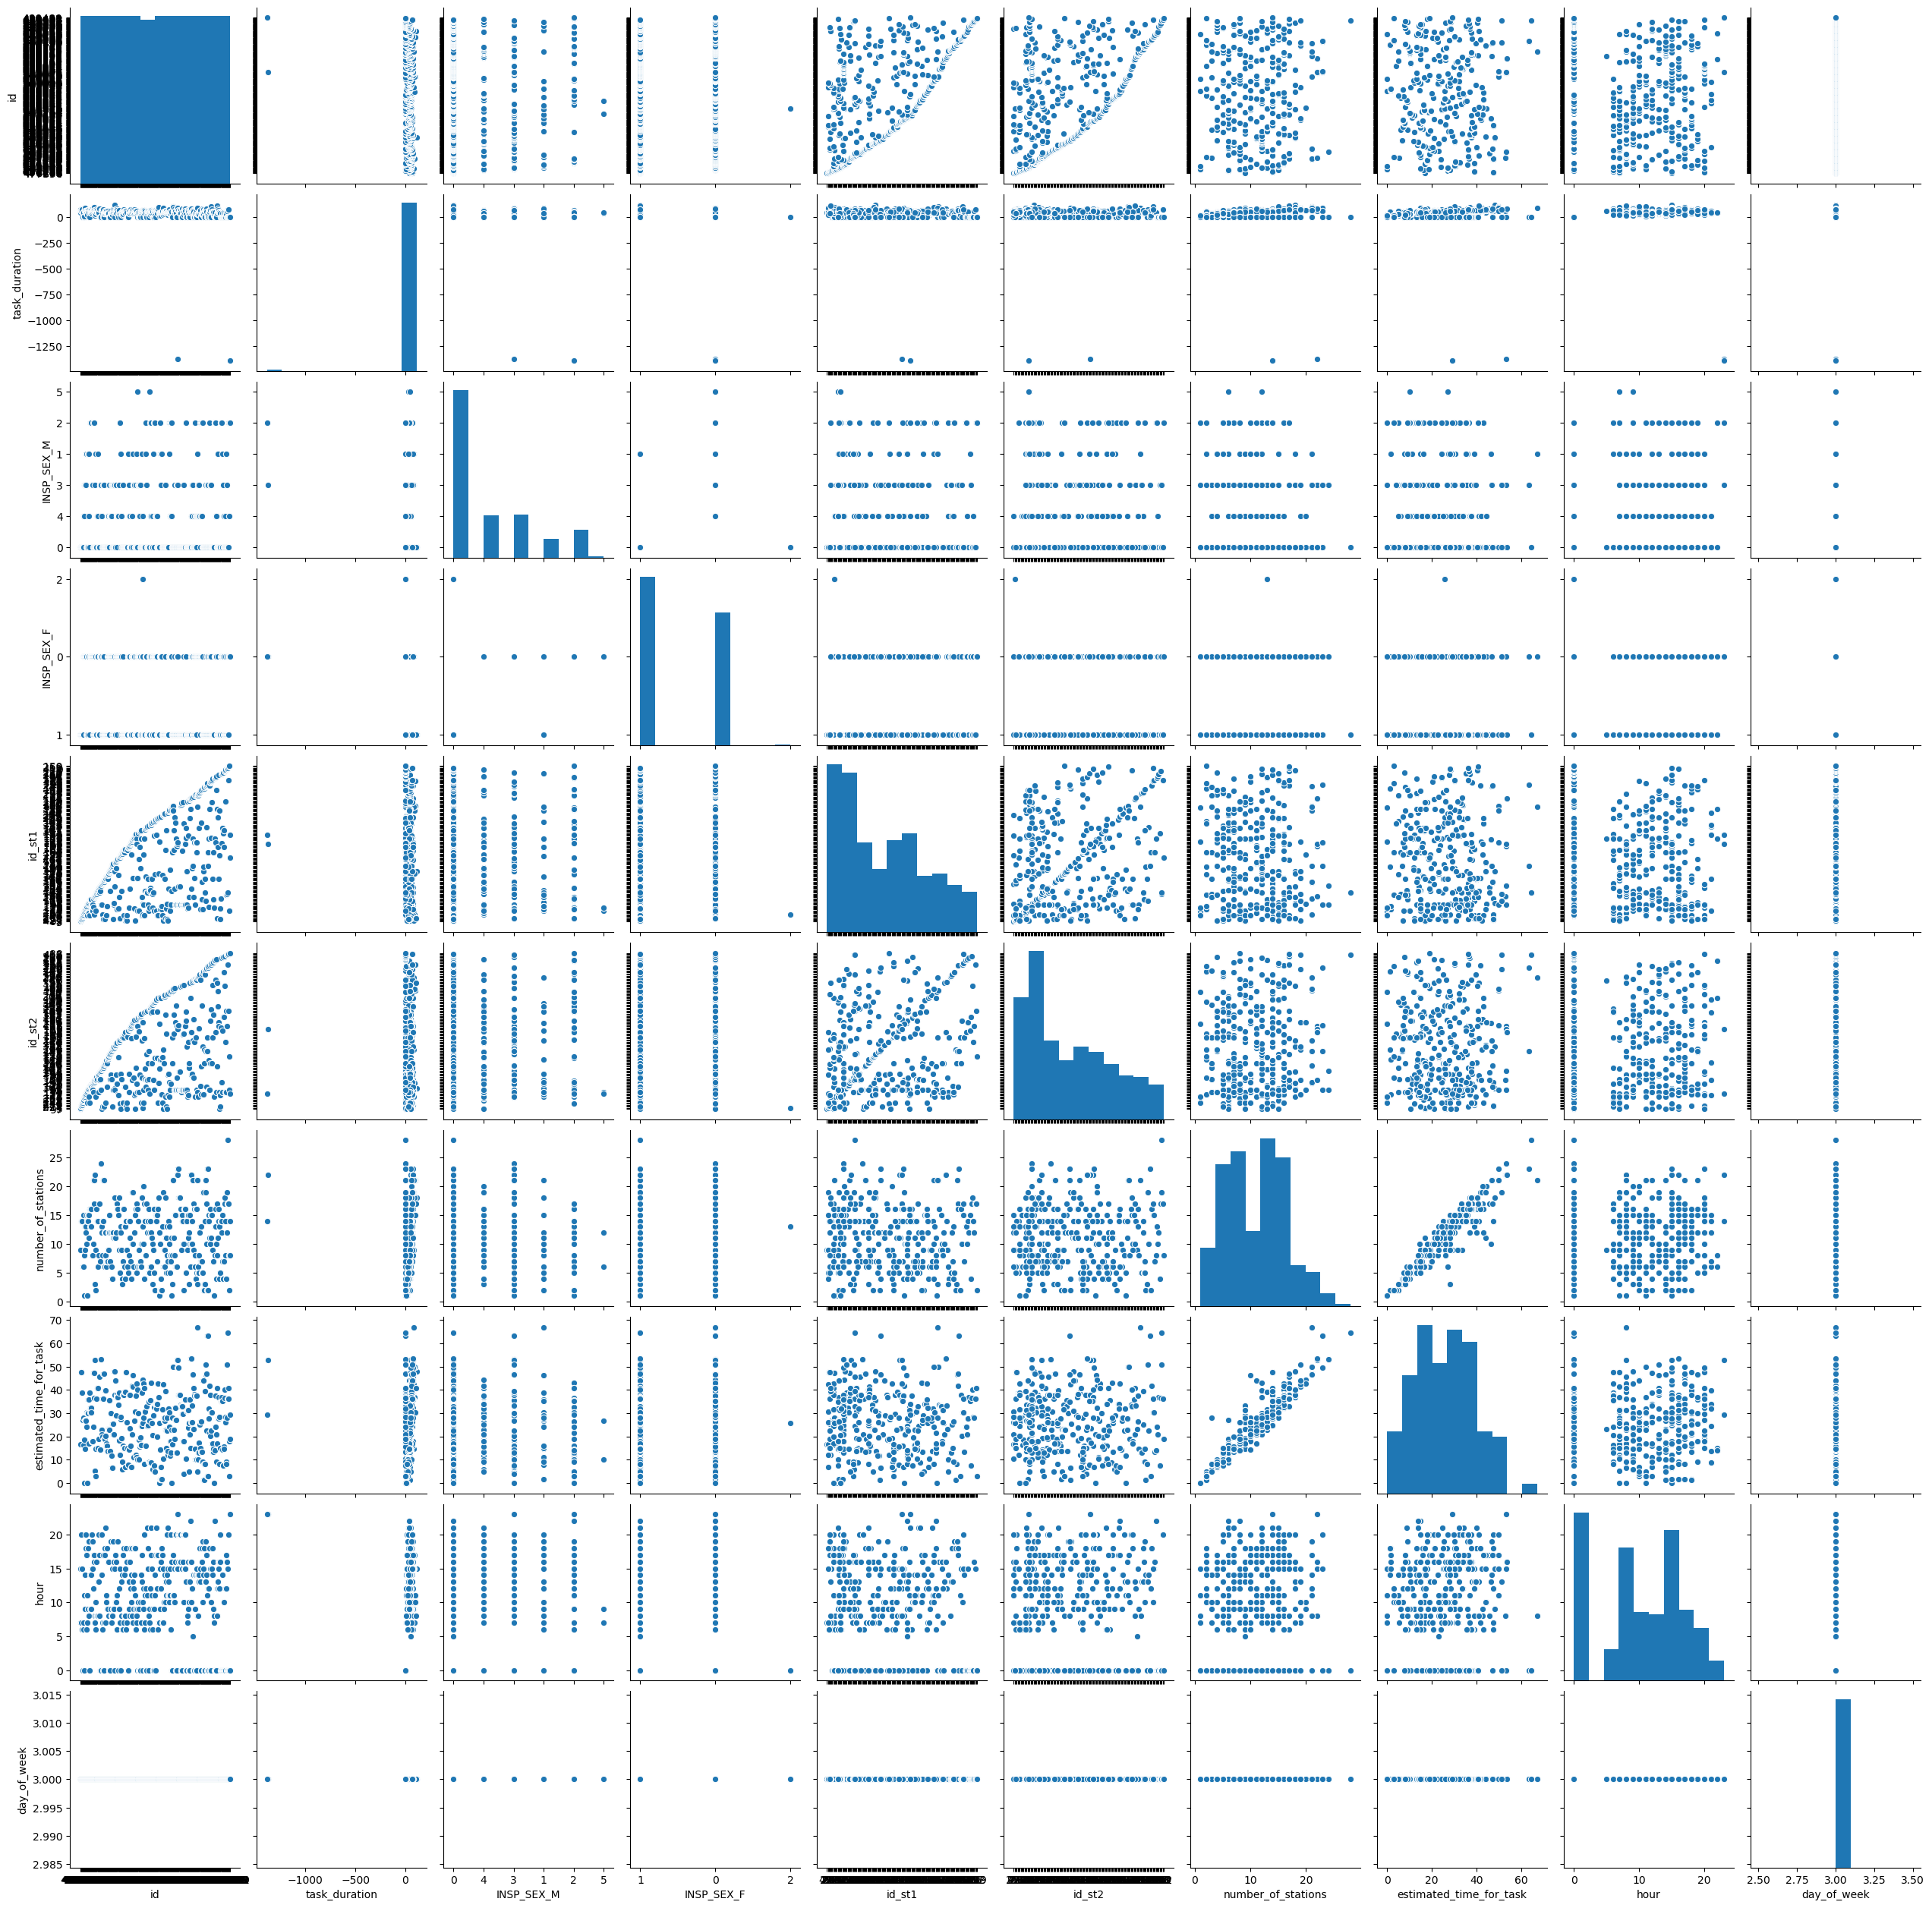

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Histograms
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Boxplots for categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='cat_pas', y='task_duration', data=df)
plt.xticks(rotation=90)
plt.show()

# Pairplot for continuous variables
sns.pairplot(df)
plt.show()

In [236]:
# Build the model including additional predictors
model = smf.ols('task_duration ~ C(cat_pas) + number_of_stations', data=df).fit()

# Summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          task_duration   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.488
Date:                Fri, 14 Jun 2024   Prob (F-statistic):              0.141
Time:                        00:15:01   Log-Likelihood:                -2352.9
No. Observations:                 389   AIC:                             4728.
Df Residuals:                     378   BIC:                             4771.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             14.1984     16

### Finding multicollinearity columns

In [234]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame with all relevant predictors
# Remove the target variable from the DataFrame
X = df[['cat_pas', 'hour', 'day_of_week', 'INSP_SEX_M', 'INSP_SEX_F', 'number_of_stations', 'estimated_time_for_task']]

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Add a constant column for the intercept term in VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF data
print(vif_data)

                    Feature         VIF
0                      hour    1.093460
1               day_of_week  303.048008
2        number_of_stations    8.655007
3   estimated_time_for_task    8.694299
4                cat_pas_ИЗ   17.327346
5               cat_pas_ИЗТ   29.965935
6                cat_pas_ИК    4.311479
7                cat_pas_ИО    4.132108
8                cat_pas_ИУ    2.901707
9                cat_pas_ОВ    1.261341
10              cat_pas_ОГД    9.771423
11               cat_pas_ПЛ    2.558637
12              cat_pas_РДК    3.305590
13             INSP_SEX_M_1   11.542811
14             INSP_SEX_M_2   20.955566
15             INSP_SEX_M_3   37.508286
16             INSP_SEX_M_4   40.146915
17             INSP_SEX_M_5    2.571184
18             INSP_SEX_F_1   61.750486
19             INSP_SEX_F_2    1.697016


### Scheduling 

In [1]:
import pandas as pd
from datetime import datetime, timedelta

In [2]:
# Sample data parsing
requests = [
    {
        "id": "484122",
        "id_pas": "44570",
        "datetime": "24.04.2024 14:30:00",
        "cat_pas": "ДИ",
        "INSP_SEX_M": "3",
        "INSP_SEX_F": "0",
        "id_st1": "117",
        "id_st2": "73"
    },
    {
        "id": "484123",
        "id_pas": "44571",
        "datetime": "24.04.2024 15:30:00",
        "cat_pas": "ДИ",
        "INSP_SEX_M": "2",
        "INSP_SEX_F": "1",
        "id_st1": "120",
        "id_st2": "75"
    }
    # Add more requests as needed
]

In [3]:
employees = [
    {"DATE":"24.04.2024","TIME_WORK":"08:00-20:00","ID":"148","FIO":"Солтан Д. С.","UCHASTOK":"ЦУ-5","SMENA":"1","RANK":"ЦСИ","SEX":"Male"},
    {"DATE":"24.04.2024","TIME_WORK":"08:00-20:00","ID":"111","FIO":"Лыков К.А.","UCHASTOK":"ЦУ-5","SMENA":"1","RANK":"ЦУ","SEX":"Male"},
    {"DATE":"24.04.2024","TIME_WORK":"10:00-22:00","ID":"85","FIO":"Христофорова О.С.","UCHASTOK":"ЦУ-5","SMENA":"1","RANK":"ЦСИ","SEX":"Female"},
    {"DATE":"24.04.2024","TIME_WORK":"08:00-20:00","ID":"24","FIO":"Тришкина Е.В.","UCHASTOK":"ЦУ-5","SMENA":"1","RANK":"ЦИ","SEX":"Female"}
    # Add more employees as needed
]


In [4]:
# Office location (example id, should be set according to your data)
office_location = "0"



In [5]:

# Convert datetime strings to datetime objects in requests
for request in requests:
    request['datetime'] = datetime.strptime(request['datetime'], "%d.%m.%Y %H:%M:%S")
    request['INSP_SEX_M'] = int(request['INSP_SEX_M'])
    request['INSP_SEX_F'] = int(request['INSP_SEX_F'])

In [6]:
# Convert employees to DataFrame for easier handling
employees_df = pd.DataFrame(employees)
employees_df['start_time'] = pd.to_datetime(employees_df['TIME_WORK'].str.split('-').str[0], format="%H:%M").dt.time
employees_df['end_time'] = pd.to_datetime(employees_df['TIME_WORK'].str.split('-').str[1], format="%H:%M").dt.time

# Initialize current location of employees to the office location
employees_df['current_location'] = office_location
employees_df['lunch_taken'] = False

print (employees_df)

         DATE    TIME_WORK   ID                FIO UCHASTOK SMENA RANK  \
0  24.04.2024  08:00-20:00  148       Солтан Д. С.     ЦУ-5     1  ЦСИ   
1  24.04.2024  08:00-20:00  111         Лыков К.А.     ЦУ-5     1   ЦУ   
2  24.04.2024  10:00-22:00   85  Христофорова О.С.     ЦУ-5     1  ЦСИ   
3  24.04.2024  08:00-20:00   24      Тришкина Е.В.     ЦУ-5     1   ЦИ   

      SEX start_time  end_time current_location  lunch_taken  
0    Male   08:00:00  20:00:00                0        False  
1    Male   08:00:00  20:00:00                0        False  
2  Female   10:00:00  22:00:00                0        False  
3  Female   08:00:00  20:00:00                0        False  


In [7]:
# Function to get travel distance (dummy implementation)
def get_travel_distance(id_st1, id_st2):
    return abs(int(id_st1) - int(id_st2))


In [8]:
# Greedy algorithm for scheduling with gender constraints, location tracking, and lunch breaks
def greedy_schedule(requests, employees):
    schedule = []
    unassigned_requests = []
    
    for request in requests:
        request_time = request['datetime']
        required_males = request['INSP_SEX_M']
        required_females = request['INSP_SEX_F']
        total_required = required_males + required_females
        assigned_employees = []
        assigned_males = 0
        assigned_females = 0
        print(f"\nProcessing request {request['id']} at {request_time}")

        for index, employee in employees.iterrows():
            travel_time_to_st1 = get_travel_distance(employee['current_location'], request['id_st1'])
            arrival_time = request_time - timedelta(minutes=15 + travel_time_to_st1)

            # Adjust employee start and end times to match the request date
            employee_start_datetime = datetime.combine(request_time.date(), employee['start_time'])
            employee_end_datetime = datetime.combine(request_time.date(), employee['end_time'])
            lunch_start = employee_start_datetime + timedelta(hours=3.5)
            lunch_end = employee_end_datetime - timedelta(hours=1)

            print(f"employee_id {employee['ID']} lunch_start {lunch_start} request_time {request_time}")

            # Ensure lunch break is taken within the allowed window
            if not employee['lunch_taken']:
                if lunch_start <= request_time <= lunch_end:
                    lunch_break_start = max(lunch_start, employee_start_datetime)
                    lunch_break_end = lunch_break_start + timedelta(minutes=60)
                    print(f"Scheduling lunch for employee {employee['ID']} from {lunch_break_start} to {lunch_break_end}")
                    schedule.append({
                        "request_id": f"lunch_{employee['ID']}",
                        "employee_id": employee['ID'],
                        "start_time": lunch_break_start,
                        "end_time": lunch_break_end,
                        "location_after": employee['current_location']
                    })
                    employees.loc[index, 'lunch_taken'] = True
                    continue

            if employee_start_datetime <= arrival_time <= employee_end_datetime:
                if employee['SEX'] == 'Female' and assigned_females < required_females:
                    assigned_females += 1
                    assigned_employees.append({
                        "request_id": request['id'],
                        "employee_id": employee['ID'],
                        "start_time": request_time,
                        "end_time": request_time + timedelta(minutes=travel_time_to_st1 + 10),
                        "location_after": request['id_st2']
                    })
                    employees.loc[index, 'start_time'] = (request_time + timedelta(minutes=travel_time_to_st1 + 10)).time()
                    employees.loc[index, 'current_location'] = request['id_st2']
                elif employee['SEX'] == 'Male' and assigned_males < (total_required - assigned_females):
                    assigned_males += 1
                    assigned_employees.append({
                        "request_id": request['id'],
                        "employee_id": employee['ID'],
                        "start_time": request_time,
                        "end_time": request_time + timedelta(minutes=travel_time_to_st1 + 10),
                        "location_after": request['id_st2']
                    })
                    employees.loc[index, 'start_time'] = (request_time + timedelta(minutes=travel_time_to_st1 + 10)).time()
                    employees.loc[index, 'current_location'] = request['id_st2']

                if assigned_females + assigned_males >= total_required:
                    break

        if assigned_females + assigned_males >= total_required:
            schedule.extend(assigned_employees)
            print(f"Request {request['id']} assigned to employees: {[emp['employee_id'] for emp in assigned_employees]}")
        else:
            unassigned_requests.append(request)
            print(f"Request {request['id']} could not be fully assigned. Required: {total_required}; Assigned: {assigned_females + assigned_males}")

    return schedule, unassigned_requests


In [9]:
# Generate schedule
schedule, unassigned_requests = greedy_schedule(requests, employees_df)
schedule_df = pd.DataFrame(schedule)
unassigned_requests_df = pd.DataFrame(unassigned_requests)


Processing request 484122 at 2024-04-24 14:30:00
employee_id 148 lunch_start 2024-04-24 11:30:00 request_time 2024-04-24 14:30:00
Scheduling lunch for employee 148 from 2024-04-24 11:30:00 to 2024-04-24 12:30:00
employee_id 111 lunch_start 2024-04-24 11:30:00 request_time 2024-04-24 14:30:00
Scheduling lunch for employee 111 from 2024-04-24 11:30:00 to 2024-04-24 12:30:00
employee_id 85 lunch_start 2024-04-24 13:30:00 request_time 2024-04-24 14:30:00
Scheduling lunch for employee 85 from 2024-04-24 13:30:00 to 2024-04-24 14:30:00
employee_id 24 lunch_start 2024-04-24 11:30:00 request_time 2024-04-24 14:30:00
Scheduling lunch for employee 24 from 2024-04-24 11:30:00 to 2024-04-24 12:30:00
Request 484122 could not be fully assigned. Required: 3; Assigned: 0

Processing request 484123 at 2024-04-24 15:30:00
employee_id 148 lunch_start 2024-04-24 11:30:00 request_time 2024-04-24 15:30:00
employee_id 111 lunch_start 2024-04-24 11:30:00 request_time 2024-04-24 15:30:00
employee_id 85 lunch_

In [10]:
print (employees_df)

         DATE    TIME_WORK   ID                FIO UCHASTOK SMENA RANK  \
0  24.04.2024  08:00-20:00  148       Солтан Д. С.     ЦУ-5     1  ЦСИ   
1  24.04.2024  08:00-20:00  111         Лыков К.А.     ЦУ-5     1   ЦУ   
2  24.04.2024  10:00-22:00   85  Христофорова О.С.     ЦУ-5     1  ЦСИ   
3  24.04.2024  08:00-20:00   24      Тришкина Е.В.     ЦУ-5     1   ЦИ   

      SEX start_time  end_time current_location  lunch_taken  
0    Male   17:40:00  20:00:00               75         True  
1    Male   17:40:00  20:00:00               75         True  
2  Female   17:40:00  22:00:00               75         True  
3  Female   08:00:00  20:00:00                0         True  


In [11]:
print("Assigned Schedule:")
print(schedule_df)
print("\nUnassigned Requests:")
print(unassigned_requests_df)

Assigned Schedule:
  request_id employee_id          start_time            end_time  \
0  lunch_148         148 2024-04-24 11:30:00 2024-04-24 12:30:00   
1  lunch_111         111 2024-04-24 11:30:00 2024-04-24 12:30:00   
2   lunch_85          85 2024-04-24 13:30:00 2024-04-24 14:30:00   
3   lunch_24          24 2024-04-24 11:30:00 2024-04-24 12:30:00   
4     484123         148 2024-04-24 15:30:00 2024-04-24 17:40:00   
5     484123         111 2024-04-24 15:30:00 2024-04-24 17:40:00   
6     484123          85 2024-04-24 15:30:00 2024-04-24 17:40:00   

  location_after  
0              0  
1              0  
2              0  
3              0  
4             75  
5             75  
6             75  

Unassigned Requests:
       id id_pas            datetime cat_pas  INSP_SEX_M  INSP_SEX_F id_st1  \
0  484122  44570 2024-04-24 14:30:00      ДИ           3           0    117   

  id_st2  
0     73  
